In [22]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# This line is needed to use CUDA on my linux box
os.environ['XLA_FLAGS']='--xla_gpu_cuda_data_dir=/usr/lib/cuda'

In [2]:
# Load and preprocess MNIST
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# Define 1 layer model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train the 1 layer MNIST model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2023-10-01 10:30:52.799035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-10-01 10:30:52.882138: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-10-01 10:30:52.882146: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2023-10-01 10:30:52.882194: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-01 10:30:52.931577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-01 10:30:53.067051: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb720354fb

59/59 [==============================] - 2s 9ms/step - loss: 0.5230 - accuracy: 0.8424 - val_loss: 0.1742 - val_accuracy: 0.9471
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9426 - val_loss: 0.1041 - val_accuracy: 0.9693
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9613 - val_loss: 0.0742 - val_accuracy: 0.9772
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9696 - val_loss: 0.0611 - val_accuracy: 0.9803
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9758 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9792 - val_loss: 0.0512 - val_accuracy: 0.9827
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.0472 - val_accuracy: 0.9839
Epoch 8/10
59/59 [=============

In [5]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 620us/step - loss: 0.0426 - accuracy: 0.9842
Test Accuracy: 0.9842000007629395


## Visualization: Training History

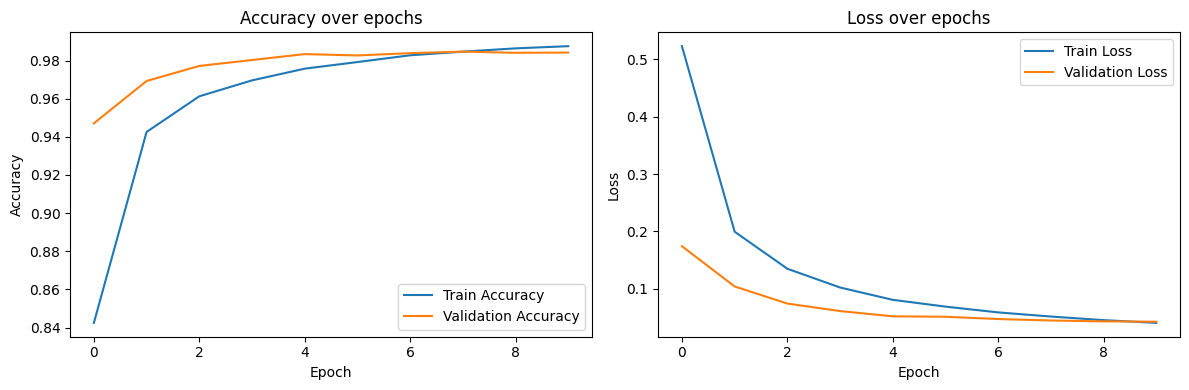

In [6]:
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Load and preprocess CIFAR-10
# Load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess data
cifar10_train_images = train_images.astype('float32') / 255
cifar10_test_images = test_images.astype('float32') / 255

cifar10_train_labels = to_categorical(train_labels)
cifar10_test_labels = to_categorical(test_labels)

In [16]:
# Define same model architecture for CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4196618 (16.01 MB)
Trainable params: 4196618 (16.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Train the 1 layer CIFAR-10 model
cifar10_history = model.fit(cifar10_train_images, cifar10_train_labels,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(cifar10_test_images, cifar10_test_labels))

Epoch 1/10
49/49 [==============================] - 1s 12ms/step - loss: 2.2809 - accuracy: 0.1682 - val_loss: 2.0298 - val_accuracy: 0.2548
Epoch 2/10
49/49 [==============================] - 0s 8ms/step - loss: 2.0116 - accuracy: 0.2522 - val_loss: 1.8068 - val_accuracy: 0.3814
Epoch 3/10
49/49 [==============================] - 0s 6ms/step - loss: 1.8496 - accuracy: 0.3099 - val_loss: 1.6622 - val_accuracy: 0.4336
Epoch 4/10
49/49 [==============================] - 0s 6ms/step - loss: 1.7730 - accuracy: 0.3363 - val_loss: 1.5906 - val_accuracy: 0.4522
Epoch 5/10
49/49 [==============================] - 0s 9ms/step - loss: 1.6983 - accuracy: 0.3639 - val_loss: 1.5227 - val_accuracy: 0.4710
Epoch 6/10
49/49 [==============================] - 0s 5ms/step - loss: 1.6583 - accuracy: 0.3827 - val_loss: 1.4883 - val_accuracy: 0.4827
Epoch 7/10
49/49 [==============================] - 0s 8ms/step - loss: 1.6194 - accuracy: 0.3962 - val_loss: 1.4478 - val_accuracy: 0.4950
Epoch 8/10
49/49 [=

In [18]:
# Model evaluation
test_loss, test_acc = model.evaluate(cifar10_test_images, cifar10_test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.3546 - accuracy: 0.5277
Test Accuracy: 0.5277000069618225


## Visualization: CIFAR-10 Training History

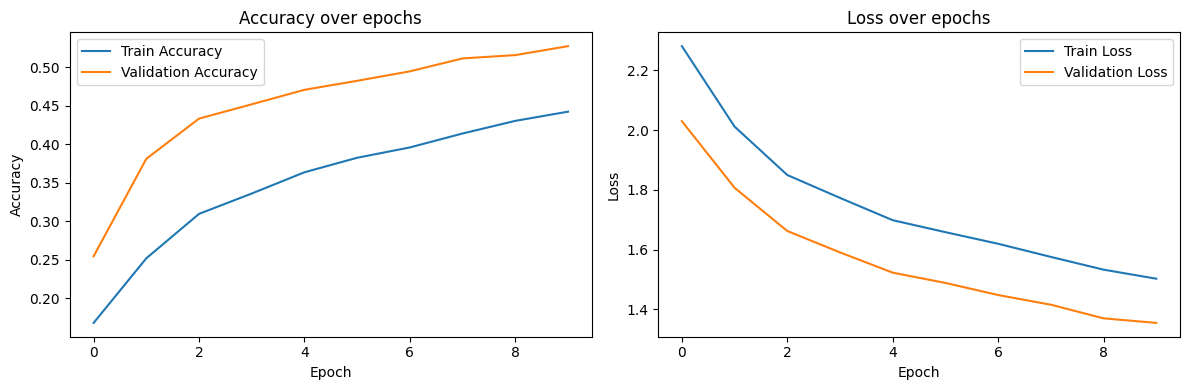

In [19]:
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cifar10_history.history['accuracy'], label='Train Accuracy')
plt.plot(cifar10_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cifar10_history.history['loss'], label='Train Loss')
plt.plot(cifar10_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Load and process Tiny Imagenet dataset

In [23]:
# rescale images and set aside 20% of data for validation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),  # Resize to the actual image size
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify this is for training data
)

# Validation generator: Similarly, for validation
val_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify this is for validation data
)

Found 80000 images belonging to 200 classes.
Found 20000 images belonging to 200 classes.


In [24]:
# Define same model architecture for CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(200, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               25800     
                                                                 
Total params: 16804040 (64.10 MB)
Trainable params: 16804040 (64.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train the 1 layer Tiny Imagenet model
imagenet_history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)

Epoch 1/10
2500/2500 [==============================] - 31s 12ms/step - loss: 5.3171 - accuracy: 0.0041 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 2/10
2500/2500 [==============================] - 9s 4ms/step - loss: 5.2996 - accuracy: 0.0043 - val_loss: 5.2983 - val_accuracy: 0.0050
Epoch 3/10
2500/2500 [==============================] - 9s 4ms/step - loss: 5.3000 - accuracy: 0.0045 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 4/10
2500/2500 [==============================] - 9s 3ms/step - loss: 5.2994 - accuracy: 0.0045 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 5/10
2500/2500 [==============================] - 9s 3ms/step - loss: 5.2994 - accuracy: 0.0040 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 5.2994 - accuracy: 0.0045 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 5.2994 - accuracy: 0.0043 - val_loss: 5.2984 - val_accurac

In [27]:
# Model evaluation using the validation generator
val_loss, val_acc = model.evaluate(val_gen, steps=val_gen.samples // val_gen.batch_size)
print("Validation Accuracy:", val_acc)

625/625 [==============================] - 2s 3ms/step - loss: 5.2984 - accuracy: 0.0050
Validation Accuracy: 0.004999999888241291


## Visualization: Tiny Imagenet training history

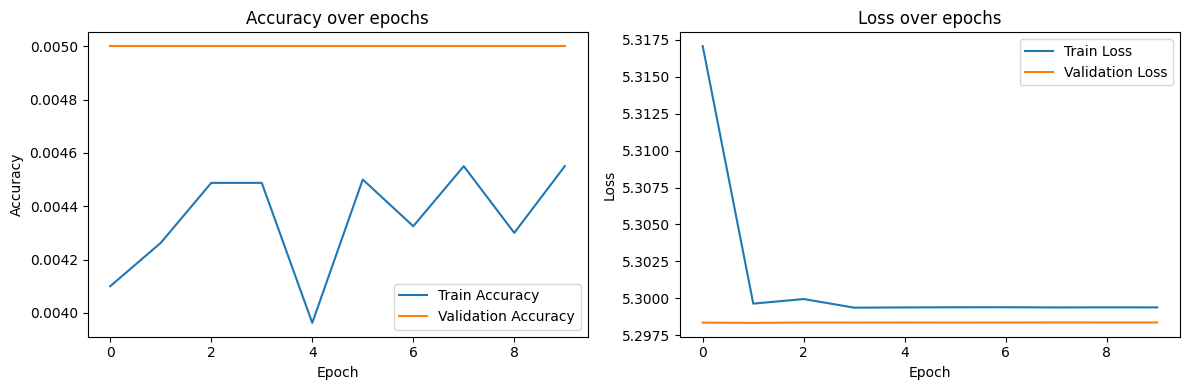

In [28]:
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(imagenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(imagenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(imagenet_history.history['loss'], label='Train Loss')
plt.plot(imagenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()